# Handling Correlated Factors Using Generalized VARS (GVARS)

## Install

This is a simple tutorial show casing GVARS functionalities that are being implement in Python. Let's install the latest VARS-TOOL package from GitHub: <br>

note: if the loading bars are not working, simply turn them off or install a lower version of pandas by doing the following:
`!pip install pandas==1.2.5`

In [1]:
!rm -rf vars-tool
!git clone https://github.com/vars-tool/vars-tool
!pip install vars-tool/.

'rm' is not recognized as an internal or external command,
operable program or batch file.
Cloning into 'vars-tool'...


Processing c:\users\corde\giws\vars-tool\tutorial\vars-tool
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for varstool: filename=varstool-2.2-py2.py3-none-any.whl size=421375 sha256=4053a80b38b362e4b3e6cf3b468d3cdd2bafd8db1ffb61cb88b24d131f481fca
  Stored in directory: c:\users\corde\appdata\local\pip\cache\wheels\ea\22\e6\94dfc4ddef885e03d97899daed3e63a6c2c3a1295f1b37f687
Successfully built varstool
  Attempting uninstall: varstool
    Found existing installation: varstool 2.2
    Uninstalling varstool-2.2:
      Successfully uninstalled varstool-2.2


## Example using the Wavy6D model

The online mode of VARS tool is where the models are ran in the GVARS analysis

Let's import GVARS for the analysis and the Model class for creating a wrapper around the desired model so that it can be inputted into GVARS

In [5]:
# importing VARS and Model from varstool package
from varstool import GVARS, Model

# Loading the "HBV_SASK" model that is included in this package
from varstool.funcs import HBV_SASK

# these are being imported in order for us to display the data nicely on the notebook
import numpy as np
import pandas as pd

Here is a quick function definition of the wavy6D model:

In [1]:
def wavy6D(x):
    '''wavy6D test function'''
    
# The features include:             
# (1) The 6 input factors are non-interacting                  
# (2) The function is "wavy" along the first 5 dimensions but with different 
#     frequencies and amplitude at different directions                                     
# (3) The last dimension (X6) is fully isensitive (dummy variable)                                         
# (4) It possess large-scale features such multi-modality (X1) 
#     to small-scale features such as roughness (X3)          
# (5) The directional variograms of X1 and X2 cross each other
    
    # check whether the input x is a dataframe
    
    if not isinstance(x, (pd.core.frame.DataFrame, pd.core.series.Series, np.ndarray, list)):
        raise TypeError('`x` must be of type pandas.DataFrame, numpy.ndarray, pd.Series, or list')
    
    if len(x) > 6:
        raise ValueError('`x` must have only five arguments at a time')
    
    y1 = -1*np.sin(2*np.pi*x[0]/2) - 0.3*np.sin(2*np.pi*x[0]/0.6)
    y2 = 0.76*(-1*np.sin(2*np.pi*(x[1]-0.2)/2)) - 0.315
    y3 = 0.12*(-1*np.sin(2*np.pi*(x[2]-0.2)/1.9)) + 0.02*(-1*np.sin(2*np.pi*x[2]/0.021)) - 0.96
    y4 = 0.12*(-1*np.sin(2*np.pi*(x[3]-0.2)/1.9))-0.97
    y5 = 0.05*(-1*np.sin(2*np.pi*(x[4]-0.2)/2))-1.02
    y6 = -1.08

    return y1 + y2 + y3 + y4 + y5 + y6

Here is a quick function definition of the Ishigami model:

In [2]:
def ishigami(x, a=7, b=0.1):
    '''Ishigami test function'''
    # check whether the input x is a dataframe
    
    if not isinstance(x, (pd.core.frame.DataFrame, pd.core.series.Series, np.ndarray, list)):
        raise TypeError('`x` must be of type pandas.DataFrame, numpy.ndarray, pd.Series, or list')
    
    if len(x) > 3:
        raise ValueError('`x` must have only three arguments at a time')
    
    return np.sin(x[0]) + a*(np.sin(x[1])**2) + b*(x[2]**4)*np.sin(x[0])

Here is a quick function definition of the first example model from the GVARS research paper:

In [3]:
def example_1(x):
    '''example 1 test function'''
    # check whether the input x is a dataframe
    
    if not isinstance(x, (pd.core.frame.DataFrame, pd.core.series.Series, np.ndarray, list)):
        raise TypeError('`x` must be of type pandas.DataFrame, numpy.ndarray, pd.Series, or list')
    
    if len(x) > 2:
        raise ValueError('`x` must have only three arguments at a time')
    
    return 1.11*(x[0]**2) + x[1]**2 - 0.2*np.cos(7*np.pi*x[1])

As mentioned previously The `Model` class is a wrapper for custom functions(models) in the online version of GVARS. However, the first paramter of every function must accept an array of parameters

Here we will create two wrappers for the testing models ishigami (for offline example) and wavy6D (for online example) :

In [6]:
ishigami_model = Model(ishigami)

In [7]:
wavy6D_model = Model(wavy6D)

When creating an experiment you will need to assign a variable to an instance of GVARS as shown below.

The attributes of the GVARS class are described as:

**paramaters**: the name of each paramter along with the following
specifications, in the following order: <br>
for `uniform` distributions: <br>
parameter name : *lower bound*, *upper bound*, *None*, `unif` <br> <br>
for `triangle` distributions: <br>
parameter name : *lower bound*, *upper bound*, *c*, `triangle` <br> <br>
for `normal` distributions: <br>
parameter name : *mean*, *standard deviation*, *None*, `norm` <br> <br>
for `lognormal` distributions: <br>
parameter name: *mean*, *standard deviation*, *None*, `lognorm` <br> <br>
for `exponential` distributions: <br>
parameter name: *mean*, *standard deviation*, *None*, `expo` <br> <br>
for `generalized extreme value` distributions: <br>
parameter name: *location*, *scale*, *shape*, `gev` <br>

**corr_mat**: the correlation matrix which describes the correlation between parameters (**must be a numpy array**)

**num_stars**: the total number of star samples that are desired for GSTAR-VARS analysis

**num_dir_samples**: the number of directional samples per star sample

**delta_h**: the sampling resolution of the GVARS analysis

**ivars_scales**: the scales that are to be used when doing IVARS, e.g, 0.1 and 0.3 correspond (0-0.1) and (0-0.3) <br /> note: can not have a scale larger then 0.5

**model**: the wrapper of your model you made when using the `Model` class

**bootstrap_flag**: this is a True/False value that specifies if bootstrapping will be used in the GVARS analysis

**bootstrap_size**: the number of sampling iterations with replacement

**bootstrap_ci**: the bootstrap-based confidence interval on results

**grouping_flag**: this is a True/False value that specifies if paramater grouping will be used in the VARS analysis

**num_grps**: the number of groups you want to split your paramaters into, if left blank the optimal number of groups will be calculated by VARS

**report_verbose**: this is a True/False value that if True will display a loading bar to show the progession of the GVARS analysis, else there will be no progression loading bar

Create `experiment_1` then initialize the values needed to run a GVARS analysis:

`experiment_1` is an instance of GVARS that is using the wavy6D model

In [8]:
experiment_1 = GVARS(parameters = {'x1': (-3.14, 3.14, None, 'unif'), 
                                  'x2': (-3.14, 3.14, None, 'unif'), 
                                  'x3': (-3.14, 3.14, None, 'unif'),
                                  'x4': (0, 1, None, 'unif'),
                                  'x5': (0, 1, None, 'unif'),
                                  'x6': (0, 1, None, 'unif')},
                    corr_mat = np.array([[1, 0, 0.8, 0, 0, 0],
                                [0, 1, 0, 0, 0, 0],
                                [0.8, 0, 1, 0, 0, 0],
                                [0, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 1, 0],
                                [0, 0, 0, 0, 0, 1]]),
                    num_stars=100,
                    num_dir_samples=10,
                    delta_h = 0.1,
                    ivars_scales = (0.1, 0.3, 0.5),
                    model = wavy6D_model,
                    seed = 1234,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci=0.9,
                    grouping_flag=True,
                    num_grps=3,
                    report_verbose=True,
                )

A report displaying the current status of the GVARS analysis can be found by typing in the variable name of the instance you created, here this is `experiment_1`

In [9]:
experiment_1

Star Centres: Not Loaded
Star Points: Not Loaded
Parameters: 6 paremeters set
Delta h: 0.1
Model: wavy6D
Seed Number: 1234
Bootstrap: Off
Bootstrap Size: N/A
Bootstrap CI: N/A
Grouping: On
Number of Groups: 3
Verbose: On
GVARS Analysis: Not Done

To run the GVARS analysis we can simply do the following:

In [10]:
experiment_1.run_online()

generating star points
 (note: first step will take awhile as the fictive matrix is being calculated):   0%| |…

function evaluation:   0%|                                                                    | 0/6000 [00:00<…

building pairs:   0%|                                                                          | 0/600 [00:00<…

calculating 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

binning and reording pairs based on 'h' values:   0%|                                            | 0/2 [00:00<…

VARS analysis:   0%|                                                                            | 0/10 [00:00<…

factor ranking:   0%|                                                                            | 0/2 [00:00<…

Now if we take a look at the status report again we can see that the `GVARS Analysis` is now done.

In [14]:
experiment_1

Star Centres: 100 Centers Loaded
Star Points: Loaded 100 stars with 10 directional samples
Parameters: 6 paremeters set
Delta h: 0.1
Model: wavy6D
Seed Number: 1234
Bootstrap: On
Bootstrap Size: 100
Bootstrap CI: 0.9
Grouping: On
Number of Groups: 3
Verbose: On
GVARS Analysis: Done

**Standard Plots**

Users can create their own plots from the resulting dataframes, but there is also access to the two plots given by the GVARS program. They can be shown by doing the following:

note: if bootstrapping is done the confidence interval limits for the ivars50 and sobol results will be shown in the bar plot

note: to display the variogram plot with the y axis in the logscale change the logy paramater to `True`

note: the plot function returns the resulting plots axes, and the barchart figure incase the user wants to edit the plots

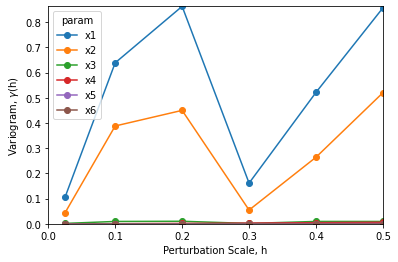

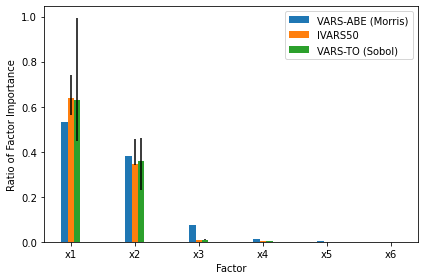

In [15]:
varsax, barfig, barax = experiment_1.plot(logy=False)

**Correlation Plot**

Users can see the correlation between two parameters by using the `correlation_plot` method. This method will display the star centres and star points for each parameter

Inputs: <br/>
`param_names`: list or array containing the names of the two desired parameters to be plotted



<AxesSubplot:title={'center':'Star Points'}, xlabel='x1', ylabel='x2'>

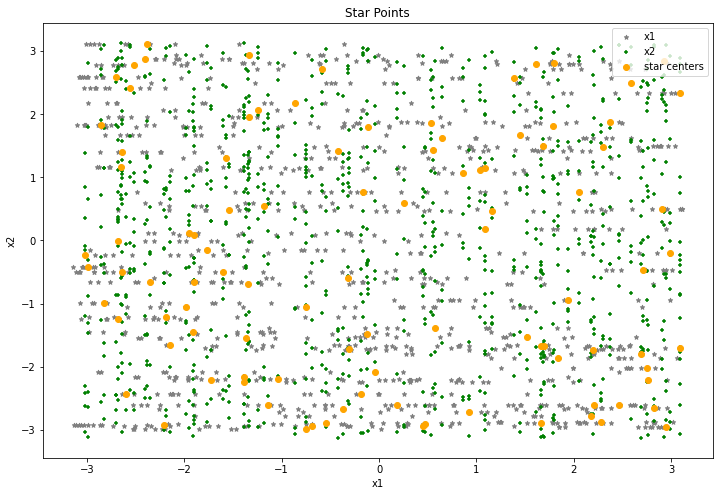

In [16]:
names = ['x1', 'x2']
experiment_1.correlation_plot(param_names=names)

**Educational Outputs** <br/>
*these outputs can be used to analyze the program on a deeper level*

The star centre samples

In [17]:
experiment_1.star_centres

array([[ 3.09084137e+00, -1.69949563e+00,  1.49545224e+00,
         5.34904523e-01,  2.38829524e-01,  6.95479699e-01],
       [ 2.92045580e+00,  2.83954459e+00,  2.14958232e+00,
         3.95425667e-01,  3.73024983e-01,  1.47191328e-01],
       [ 2.58266787e+00,  2.49372578e+00,  7.16148351e-01,
         1.95631052e-02,  6.08007576e-01,  8.12981094e-01],
       [-1.89649030e+00, -6.64319265e-01, -3.54135827e-01,
         8.85897802e-01,  2.81986808e-01,  8.66017388e-01],
       [-1.90307418e+00,  8.11971523e-02, -1.14343914e+00,
         4.23828216e-01,  6.07207387e-01,  2.45551693e-01],
       [-2.65321389e+00,  1.16125801e+00, -2.30600181e+00,
         1.44820403e-02,  9.31578267e-01,  5.97933928e-01],
       [ 1.83503654e+00, -1.85634194e+00,  2.81597732e+00,
         7.14377335e-01,  9.80814280e-01,  3.69613041e-01],
       [-5.88812036e-01,  2.72563853e+00,  1.82383222e+00,
         7.43663855e-01,  1.71512441e-01,  5.07749140e-02],
       [-1.18450881e+00,  5.51175565e-01, -1.169

Dataframe containing star points

In [18]:
experiment_1.star_points

x1        x2        x3        x4        x5  \
centre param points                                                     
0      x1    0       1.696918 -1.699496  1.495452  0.534905  0.238830   
             1       2.113940 -1.699496  1.495452  0.534905  0.238830   
             2       2.930574 -1.699496  1.495452  0.534905  0.238830   
             3      -1.205409 -1.699496  1.495452  0.534905  0.238830   
             4      -0.656407 -1.699496  1.495452  0.534905  0.238830   
...                       ...       ...       ...       ...       ...   
99     x6    5      -2.602338 -2.429581 -1.887262  0.325578  0.982336   
             6      -2.602338 -2.429581 -1.887262  0.325578  0.982336   
             7      -2.602338 -2.429581 -1.887262  0.325578  0.982336   
             8      -2.602338 -2.429581 -1.887262  0.325578  0.982336   
             9      -2.602338 -2.429581 -1.887262  0.325578  0.982336   

                           x6  
centre param points            
0      x1    0       0.695480  
             1       0.695480  
             2       0.695480  
             3       0.695480  
             4       0.695480  
...                       ...  
99     x6    5       0.691513  
             6       0.159077  
             7       0.641366  
             8       0.888763  
             9       0.155296  

[6000 rows x 6 columns]

Dataframe containig the star points along with the models output

In [19]:
experiment_1.model_df

x1        x2        x3        x4        x5  \
centre param points                                                     
0      x1    0       1.696918 -1.699496  1.495452  0.534905  0.238830   
             1       2.113940 -1.699496  1.495452  0.534905  0.238830   
             2       2.930574 -1.699496  1.495452  0.534905  0.238830   
             3      -1.205409 -1.699496  1.495452  0.534905  0.238830   
             4      -0.656407 -1.699496  1.495452  0.534905  0.238830   
...                       ...       ...       ...       ...       ...   
99     x6    5      -2.602338 -2.429581 -1.887262  0.325578  0.982336   
             6      -2.602338 -2.429581 -1.887262  0.325578  0.982336   
             7      -2.602338 -2.429581 -1.887262  0.325578  0.982336   
             8      -2.602338 -2.429581 -1.887262  0.325578  0.982336   
             9      -2.602338 -2.429581 -1.887262  0.325578  0.982336   

                           x6    wavy6D  
centre param points                      
0      x1    0       0.695480 -3.525529  
             1       0.695480 -4.911430  
             2       0.695480 -4.621698  
             3       0.695480 -5.189174  
             4       0.695480 -3.555941  
...                       ...       ...  
99     x6    5       0.691513 -2.467252  
             6       0.159077 -2.467252  
             7       0.641366 -2.467252  
             8       0.888763 -2.467252  
             9       0.155296 -2.467252  

[6000 rows x 7 columns]

Dataframe containing the pairs for variogram analysis along with their dissimilarity

In [20]:
experiment_1.pair_df

0         1  dissimilarity
centre param h     actual h pair_ind                                   
0      x1    0.025 0.026442 (7, 9)   -5.395680 -5.371777       0.000286
                   0.032734 (6, 7)   -4.351833 -5.395680       0.544808
             0.100 0.066405 (0, 1)   -3.525529 -4.911430       0.960361
                   0.130037 (1, 2)   -4.911430 -4.621698       0.041972
                   0.059176 (6, 9)   -4.351833 -5.371777       0.520142
...                                        ...       ...            ...
99     x6    0.600 0.560650 (4, 9)   -2.467252 -2.467252       0.000000
             0.700 0.658135 (1, 6)   -2.467252 -2.467252       0.000000
                   0.733468 (8, 9)   -2.467252 -2.467252       0.000000
                   0.729686 (6, 8)   -2.467252 -2.467252       0.000000
                   0.661916 (1, 9)   -2.467252 -2.467252       0.000000

[27000 rows x 3 columns]

The fictive correlation matrix

In [21]:
experiment_1.cov_mat

array([[ 1.00000000e+00, -8.50339838e-18,  8.13474957e-01,
         8.08903099e-18,  8.08903099e-18,  8.08903099e-18],
       [-8.50339838e-18,  1.00000000e+00, -8.50339838e-18,
         8.08903099e-18,  8.08903099e-18,  8.08903099e-18],
       [ 8.13474957e-01, -8.50339838e-18,  1.00000000e+00,
         8.08903099e-18,  8.08903099e-18,  8.08903099e-18],
       [ 8.08903099e-18,  8.08903099e-18,  8.08903099e-18,
         1.00000000e+00,  3.60218786e-06,  3.60218786e-06],
       [ 8.08903099e-18,  8.08903099e-18,  8.08903099e-18,
         3.60218786e-06,  1.00000000e+00,  3.60218786e-06],
       [ 8.08903099e-18,  8.08903099e-18,  8.08903099e-18,
         3.60218786e-06,  3.60218786e-06,  1.00000000e+00]])

**Standard Outputs**



Most useful results are stored in the `.output` property as a dictionary. The variables stores could be seen quickly by:

In [22]:
experiment_1.output.keys()

dict_keys(['Gamma', 'ST', 'MAEE', 'MEE', 'COV', 'ECOV', 'IVARS', 'IVARSid', 'rnkST', 'rnkIVARS', 'Gammalb', 'Gammaub', 'STlb', 'STub', 'IVARSlb', 'IVARSub', 'relST', 'relIVARS', 'Groups', 'relGrp'])

and each output can be viewed by using the method shown in the next line:

In [23]:
experiment_1.output['Gamma'].unstack(level=0) # adding unstack to make it more legible

param,x1,x2,x3,x4,x5,x6
h,,,,,,
0.025,0.104455,0.042960,0.001579,0.000034,0.000005,0.0
0.100,0.638917,0.388261,0.009341,0.000395,0.000067,0.0
0.200,0.863153,0.450261,0.010098,0.001502,0.000241,0.0
0.300,0.161498,0.054564,0.001464,0.002890,0.000486,0.0
0.400,0.521913,0.264401,0.009398,0.004556,0.000768,0.0
0.500,0.857551,0.520598,0.009316,0.006235,0.001029,0.0
0.600,0.222983,0.126870,0.001682,0.007299,0.001172,0.0
0.700,0.427120,0.174785,0.007581,0.008696,0.001416,0.0
0.800,1.120939,0.525682,0.010738,0.008983,0.001603,0.0


Now we can access all the results using 'dot' notation on our created instance:

**Directional variogram results**

There are 10 rows as the number of stars was 10, and each at a resolution incremented by 0.1 which was specificed to be the sampling resolution

In [24]:
experiment_1.gamma.unstack(0)

param,x1,x2,x3,x4,x5,x6
h,,,,,,
0.025,0.104455,0.042960,0.001579,0.000034,0.000005,0.0
0.100,0.638917,0.388261,0.009341,0.000395,0.000067,0.0
0.200,0.863153,0.450261,0.010098,0.001502,0.000241,0.0
0.300,0.161498,0.054564,0.001464,0.002890,0.000486,0.0
0.400,0.521913,0.264401,0.009398,0.004556,0.000768,0.0
0.500,0.857551,0.520598,0.009316,0.006235,0.001029,0.0
0.600,0.222983,0.126870,0.001682,0.007299,0.001172,0.0
0.700,0.427120,0.174785,0.007581,0.008696,0.001416,0.0
0.800,1.120939,0.525682,0.010738,0.008983,0.001603,0.0


**Integrated variogram**

In [25]:
experiment_1.ivars

,x1,x2,x3,x4,x5,x6
0.1,0.031946,0.019413,0.000467,0.000020,0.000003,0.0
0.3,0.158282,0.086580,0.002017,0.000334,0.000055,0.0
0.5,0.261426,0.141779,0.003496,0.001246,0.000208,0.0


**VARS-TO: Sobol total-order effects calculated through GVARS**

In [26]:
experiment_1.st

param
x1    6.785260e-01
x2    3.889050e-01
x3    9.168147e-03
x4    3.587337e-03
x5    5.469359e-04
x6    6.277613e-31
dtype: float64

**VARS-ABE: Morris mean absolute elementary effects across scales**

In [27]:
experiment_1.maee.unstack(0)

param,x1,x2,x3,x4,x5,x6
h,,,,,,
0.025,0.323587,0.232042,0.045195,0.006495,0.002564,0.0
0.100,0.979984,0.782837,0.119593,0.024362,0.010097,0.0
0.200,1.158892,0.851942,0.124300,0.047746,0.019198,0.0
0.300,0.460767,0.246564,0.042731,0.064957,0.027061,0.0
0.400,0.893882,0.610250,0.121511,0.081406,0.033401,0.0
0.500,1.149032,0.922264,0.116835,0.096065,0.038943,0.0
0.600,0.560638,0.398074,0.048284,0.105344,0.041993,0.0
0.700,0.759755,0.481083,0.102088,0.122186,0.049402,0.0
0.800,1.425075,0.917744,0.135568,0.128679,0.054914,0.0


**VARS-ACE: Morris mean actual elementary effects across scales**

In [28]:
experiment_1.mee.unstack(0)

param,x1,x2,x3,x4,x5,x6
h,,,,,,
0.025,-0.000624,-0.002115,-0.001197,-0.000061,0.000251,0.0
0.100,0.003152,0.017398,0.001758,0.000633,0.000169,0.0
0.200,0.062010,0.032043,-0.006406,0.002750,0.000319,0.0
0.300,0.004267,0.005892,-0.001338,0.005364,0.000299,0.0
0.400,0.017199,0.116769,-0.010704,0.011521,0.001399,0.0
0.500,-0.113408,-0.001827,0.002592,0.001046,0.001170,0.0
0.600,0.071694,-0.000168,0.006726,0.004303,-0.004082,0.0
0.700,-0.434114,0.046602,-0.017323,0.011493,0.002582,0.0
0.800,-0.272263,-0.054567,-0.051330,0.011696,0.008192,0.0


**The factor(parameter) rankings based on their influence for IVARS and Sobol results**. 

The influence is based on how large or small a result is. The lower the ranking the more influential(larger) a factor is.

In [29]:
experiment_1.ivars_factor_ranking

,x1,x2,x3,x4,x5,x6
0.1,0,1,2,3,4,5
0.3,0,1,2,3,4,5
0.5,0,1,2,3,4,5


In [30]:
experiment_1.st_factor_ranking

,x1,x2,x3,x4,x5,x6
,0,1,2,3,4,5


**Bootstrapping results based on the confidence interval limits**

low is the lower limit of the results after `bootstrap_size` sampling iterations

upp is the upper limit of the results after `bootstrap_size` sampling iterations

In [31]:
experiment_1.gammalb

h,x1,x2,x3,x4,x5,x6
0.025,0.067158,0.018955,0.000777,0.000017,0.000002,0.0
0.100,0.652657,0.324742,0.006905,0.000251,0.000034,0.0
0.200,0.739388,0.459469,0.006467,0.000820,0.000101,0.0
0.300,0.141518,0.023345,0.001233,0.001695,0.000238,0.0
0.400,0.346300,0.216408,0.007164,0.002367,0.000437,0.0
0.500,0.312769,0.509957,0.001446,0.004748,0.000814,0.0
0.600,0.013424,0.057393,0.000021,0.002220,0.000762,0.0
0.700,0.161014,0.159791,0.007710,0.006049,0.001014,0.0
0.800,0.207455,0.198569,0.006718,0.007157,0.000821,0.0
0.900,NaN,0.061025,NaN,0.006828,0.001253,0.0


In [32]:
experiment_1.gammaub

h,x1,x2,x3,x4,x5,x6
0.025,0.117546,0.043355,0.001856,0.000031,0.000005,0.0
0.100,0.899268,0.434878,0.010231,0.000493,0.000055,0.0
0.200,1.162675,0.692907,0.009795,0.001254,0.000169,0.0
0.300,0.216408,0.047635,0.002075,0.003203,0.000417,0.0
0.400,0.631092,0.399551,0.010494,0.003598,0.000806,0.0
0.500,0.753293,0.752512,0.008270,0.007713,0.001610,0.0
0.600,0.453507,0.161332,0.002575,0.005895,0.001849,0.0
0.700,0.161014,0.290697,0.007710,0.010226,0.002039,0.0
0.800,0.207455,0.549172,0.006718,0.011379,0.001618,0.0
0.900,NaN,0.326357,NaN,0.009022,0.001994,0.0


In [33]:
experiment_1.stlb

param,x1,x2,x3,x4,x5,x6
,0.48483,0.250955,0.00649,0.00178,0.000318,3.428034e-31


In [34]:
experiment_1.stub

param,x1,x2,x3,x4,x5,x6
,1.076131,0.49815,0.011204,0.003905,0.000752,8.531211e-31


In [35]:
experiment_1.ivarslb

,x1,x2,x3,x4,x5,x6
0.1,0.032633,0.016237,0.000345,0.000013,0.000002,0.0
0.3,0.150208,0.081359,0.001477,0.000201,0.000029,0.0
0.5,0.229037,0.139199,0.002454,0.000840,0.000135,0.0


In [36]:
experiment_1.ivarsub

,x1,x2,x3,x4,x5,x6
0.1,0.044963,0.021744,0.000512,0.000025,0.000003,0.0
0.3,0.208167,0.114067,0.002061,0.000326,0.000040,0.0
0.5,0.302080,0.186880,0.003380,0.001158,0.000217,0.0


**Reliability estimates of factor rankings based on VARS-TO**

reliability estimates give the ratio of how many bootstrapped rankings were the same as the initial rankings for `bootstrap_size` sampling iterations

In [37]:
experiment_1.rel_st_factor_ranking

,x1,x2,x3,x4,x5,x6
,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
experiment_1.rel_ivars_factor_ranking

,x1,x2,x3,x4,x5,x6
0.1,1.0,1.0,1.0,1.0,1.0,1.0
0.3,1.0,1.0,1.0,1.0,1.0,1.0
0.5,1.0,1.0,1.0,1.0,1.0,1.0


**Factor grouping based on IVARS50 and Sobol results**

In [39]:
experiment_1.ivars50_grp

,x1,x2,x3,x4,x5,x6
0.5,1,3,2,1,3,2


In [40]:
experiment_1.st_grp

,x1,x2,x3,x4,x5,x6
,1,3,2,1,3,2


**Reliability estimates of rankings based on grouping**

In [41]:
experiment_1.reli_st_grp

,x1,x2,x3,x4,x5,x6
,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
experiment_1.reli_ivars50_grp

,x1,x2,x3,x4,x5,x6
0.5,1.0,1.0,1.0,1.0,1.0,1.0


#### Advanced Results

**Directional covariogram results**

In [43]:
experiment_1.cov.unstack(0)

param,x1,x2,x3,x4,x5,x6
h,,,,,,
0.025,0.641335,0.702008,0.583674,0.667534,0.643128,0.660658
0.100,0.224070,0.534703,0.639784,0.645533,0.670814,0.716508
0.200,-0.022745,0.375307,0.637185,0.626242,0.709728,0.639356
0.300,0.586050,0.771743,0.621680,0.730131,0.687107,0.651555
0.400,0.278869,0.561443,0.726266,0.641641,0.635703,0.637668
0.500,-0.106127,0.351728,0.802403,0.682322,0.587509,0.739958
0.600,0.457148,0.650768,0.478531,0.651344,0.653164,0.620058
0.700,0.350986,0.477707,0.757271,0.652561,0.717433,0.606971
0.800,-0.234148,0.291419,1.228647,0.737357,0.611515,0.662713


**Directional expected covariogram results**

In [44]:
experiment_1.ecov.unstack(0)

param,x1,x2,x3,x4,x5,x6
h,,,,,,
0.025,0.259127,0.169201,0.003537,0.002812,0.000447,4.516229e-31
0.100,-0.150773,-0.108476,-0.002745,0.002186,0.000327,4.516229e-31
0.200,-0.291217,-0.166364,-0.002996,0.001127,0.000197,4.482164e-31
0.300,0.224892,0.177054,0.003795,0.000051,-0.000010,4.554249e-31
0.400,-0.046208,-0.012368,-0.002407,-0.001388,-0.000203,4.482164e-31
0.500,-0.325342,-0.207720,-0.002062,-0.002478,-0.000416,4.482164e-31
0.600,0.235308,0.089789,0.003326,-0.003039,-0.000498,4.527901e-31
0.700,0.072039,0.055876,-0.002519,-0.003696,-0.000590,4.504575e-31
0.800,-0.340681,-0.234645,-0.005081,-0.003278,-0.000671,4.479603e-31


## Example using the Ishigami model in offline mode

The offline mode of VARS tool is where the models are ran outside of the GVARS analysis

So again, we start with creating `experiment_2`

In [45]:
experiment_2 = GVARS(parameters = {'x1': (0, 1, None, 'unif'), 
                                  'x2': (0, 1, None, 'unif'), 
                                  'x3': (0, 1, None, 'unif')},
                    corr_mat = np.array([[1, 0, 0],
                                [0, 1, 0],
                                [0, 0, 1]]),
                    num_stars=50,
                    num_dir_samples=10,
                    delta_h = 0.1,
                    ivars_scales = (0.1, 0.3, 0.5),
                    model = ishigami_model,
                    seed = 1234,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci=0.9,
                    grouping_flag=True,
                    num_grps=2,
                    report_verbose=True,
                )

What we will be doing first is generating the `star_points` based of the star centre samples generated in the VARS instance using a method named `generate_star`

In [46]:
star_points = experiment_2.generate_star()

generating star points
 (note: first step will take awhile as the fictive matrix is being calculated):   0%|  …

Now you will have access to the star points that you can apply to your model outside of Python or GVARS

In [47]:
star_points

x1        x2        x3
centre param points                              
0      x1    0       0.647945  0.718431  0.748200
             1       0.786497  0.718431  0.748200
             2       0.988123  0.718431  0.748200
             3       0.039730  0.718431  0.748200
             4       0.088902  0.718431  0.748200
...                       ...       ...       ...
49     x3    5       0.538019  0.133492  0.954424
             6       0.538019  0.133492  0.349728
             7       0.538019  0.133492  0.003882
             8       0.538019  0.133492  0.389910
             9       0.538019  0.133492  0.445346

[1500 rows x 3 columns]

These star points (along with any of the GVARS result data frames) can be extracted to a .csv file by doing the following:

note: the format of the .csv file will be the exact same as the data frame shown above but with `,` as the delimeter

In [48]:
path = 'star_points'  # type your desired file path here as a string (right now a file named star_points will be put in your current working directory)
star_points.to_csv(path)

*****
Here I will be creating the `star_points_results` csv file with ishigami applied to all the star points 

**NOTE**: this is the same as what is done in online mode and is just for example, you should do this your own way if you are wanting to use offline mode

In [49]:
# **** you do not need to understand this block of code ****
applied_df = star_points.merge(star_points.drop_duplicates()
                     .assign(**{ishigami.__name__: lambda x: x.apply(ishigami, axis=1)}), 
                     how='left')

applied_df.index = star_points.index

applied_df.to_csv('star_points_results')

****
Now after you apply your model to the star points you must put your results in the right most column of the .csv file, with the header of the column being the name of the model you are using. This can be done in excel, notepad, etc. Once the results are placed in the .csv file correctly we must convert it back to a data frame to run the GVARS analysis by doing the following:

note: this dataframe is the standard format that is expected to be inputted into the `run_offline` method

In [50]:
modelframe = pd.read_csv('star_points_results', index_col=[0, 1, 2])
modelframe

x1        x2        x3  ishigami
centre param points                                        
0      x1    0       0.647945  0.718431  0.748200  3.655092
             1       0.786497  0.718431  0.748200  3.762696
             2       0.988123  0.718431  0.748200  3.893791
             3       0.039730  0.718431  0.748200  3.073593
             4       0.088902  0.718431  0.748200  3.124197
...                       ...       ...       ...       ...
49     x3    5       0.538019  0.133492  0.954424  0.678959
             6       0.538019  0.133492  0.349728  0.637204
             7       0.538019  0.133492  0.003882  0.636438
             8       0.538019  0.133492  0.389910  0.637622
             9       0.538019  0.133492  0.445346  0.638453

[1500 rows x 4 columns]

Now to run the GVARS analysis simply do the following:

In [51]:
experiment_2.run_offline(modelframe)

building pairs:   0%|          | 0/150 [00:00<?, ?it/s]

calculating 'h' values:   0%|          | 0/50 [00:00<?, ?it/s]

binning and reording pairs based on 'h' values:   0%|          | 0/2 [00:00<?, ?it/s]

VARS analysis:   0%|          | 0/10 [00:00<?, ?it/s]

factor ranking:   0%|          | 0/2 [00:00<?, ?it/s]

bootstrapping:   0%|          | 0/100 [00:00<?, ?it/s]

Now all the results can be accesed the exact same way as they were for online mode with `experiment_1`

# DIY

How about you test `experiment_3` yourself? 

In [10]:
example_1_model = Model(example_1)

In [11]:
experiment_3 = GVARS(parameters = {'x1': (-1, 1, None, 'unif'), 
                                  'x2': (-1, 1, None, 'unif')},
                    corr_mat = np.array([[1, -0.8],
                                [-0.8, 1]]),
                    num_stars=1000,
                    num_dir_samples=100,
                    delta_h = 0.01,
                    ivars_scales = (0.1, 0.3, 0.5),
                    model = example_1_model,
                    seed = 1234,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci=0.9,
                    grouping_flag=False,
                    num_grps=2,
                    report_verbose=True,
                )

In [12]:
experiment_3

Star Points: Not Loaded
Parameters: 2 paremeters set
Delta h: 0.01
Model: example_1
Seed Number: 45311056
Bootstrap: On
Bootstrap Size: 100
Bootstrap CI: 0.9
Grouping: On
Number of Groups: 2
Verbose: On
GVARS Analysis: Not Done